# Intro


1) Распознование лиц - безопасность
2) Рекомендации по предпочтнию пользователя - удобство для платформы
3) Предсказание болезни - уменьшение невыявленных болезней
4) Предсказание какую таблетку должен выпить больной - сокращение нагрузки на мед персонал
5) Выбор сегмента пользователей, на которых пойдействует промо акция - большая рентабельность 

1) регрессия
2) ассоциации 
3) классификация 
4) регрессия 
5) кластеризация

### `разница multiclass/multilabel`
#### multiclass - объект принадлежит одному классу из многих
#### multilabel - объект может принадлежать сразу нескольким классам

Пример - это регрессия, т.к. цена - число, но задачу можно превратить в классификацию, если цены разбить на категории.

# Introduction to Data Analysis

In [379]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


In [380]:
df=pd.read_json("data/train.json")

In [381]:
df.shape

(49352, 15)

target - price

In [382]:
list(df.columns)

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [384]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [385]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [386]:
df=df[['bathrooms', 'bedrooms','price', 'interest_level']]

## Statistical Data Analysis

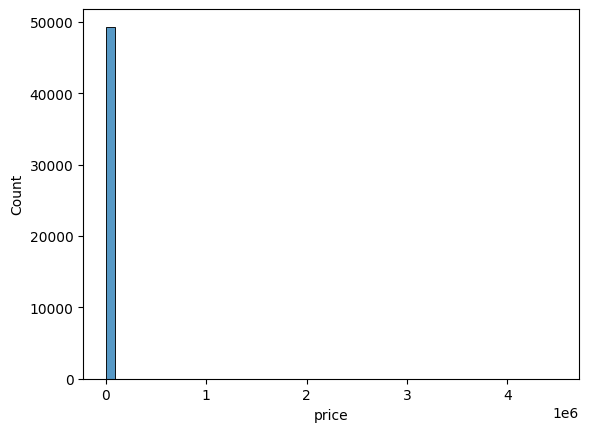

In [409]:
sns.histplot(data=df, x='price', bins=50)
plt.show()

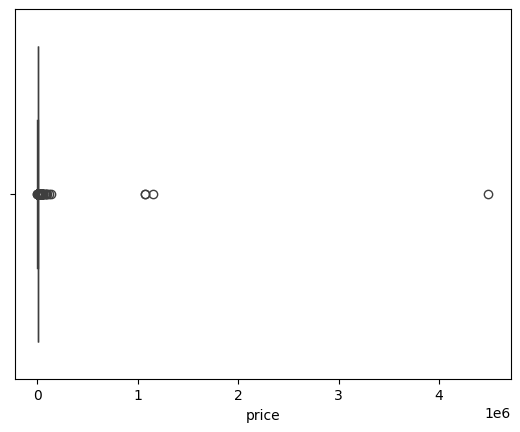

In [411]:
sns.boxplot(data=df, x='price')
plt.show()

In [389]:
lower_percentile = df['price'].quantile(0.01)
upper_percentile = df['price'].quantile(0.99)
new_df = df[(df['price'] > lower_percentile) & (df['price'] < upper_percentile)].copy()

In [390]:
new_df

,bathrooms,bedrooms,price,interest_level
4,1.0,1,2400,medium
6,1.0,2,3800,low
9,1.0,2,3495,medium
10,1.5,3,3000,medium
15,1.0,0,2795,low
...,...,...,...,...
124000,1.0,3,2800,low
124002,1.0,2,2395,medium
124004,1.0,1,1850,medium
124008,1.0,2,4195,medium


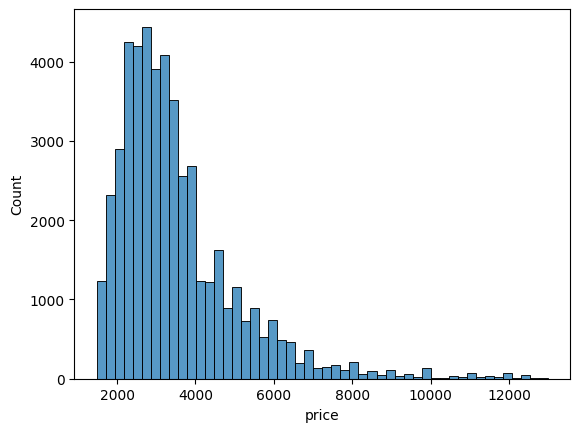

In [391]:
sns.histplot(data=new_df, x='price', bins=50)
plt.show()

In [392]:
new_df['interest_level'].info()

<class 'pandas.core.series.Series'>
Index: 48343 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48343 non-null  object
dtypes: object(1)
memory usage: 755.4+ KB


In [393]:
new_df.groupby(['interest_level']).count()

,bathrooms,bedrooms,price
interest_level,,,
high,3557,3557,3557
low,33672,33672,33672
medium,11114,11114,11114


In [394]:
mapping = {'low': 0, 'medium': 1, 'high': 2}
new_df['interest_level'] = new_df['interest_level'].map(mapping)

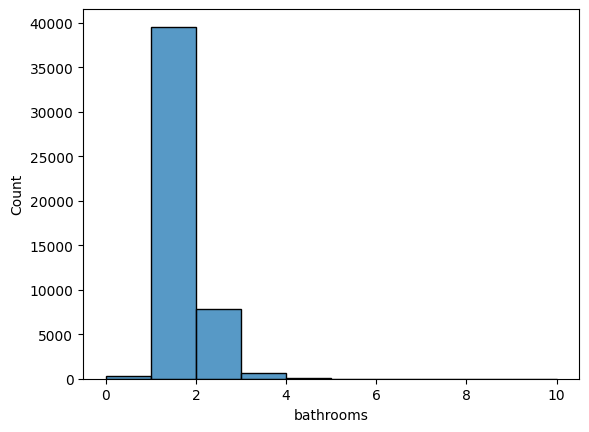

In [395]:
sns.histplot(data=new_df, x='bathrooms', bins=10)
plt.show()

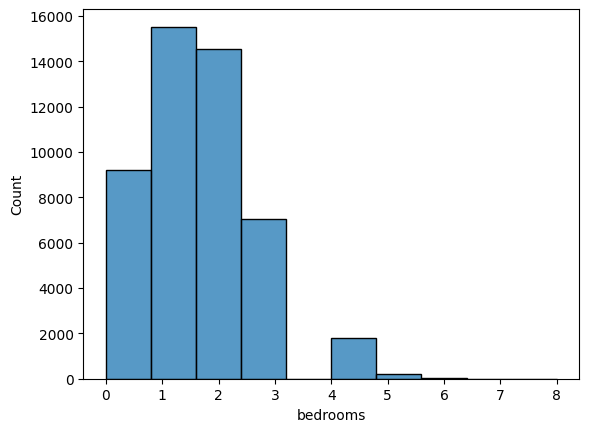

In [396]:
sns.histplot(data=new_df, x='bedrooms', bins=10)
plt.show()

In [412]:
corr = new_df.corr(method='pearson')
corr

,bathrooms,bedrooms,price,interest_level
bathrooms,1.000000,0.517200,0.670808,-0.062819
bedrooms,0.517200,1.000000,0.547310,0.051282
price,0.670808,0.547310,1.000000,-0.199652
interest_level,-0.062819,0.051282,-0.199652,1.000000


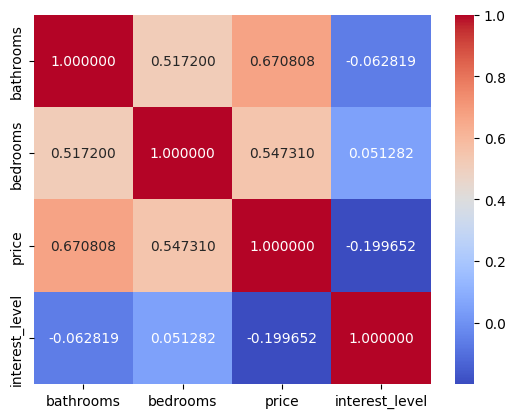

In [413]:
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt = '.6f')
plt.show()

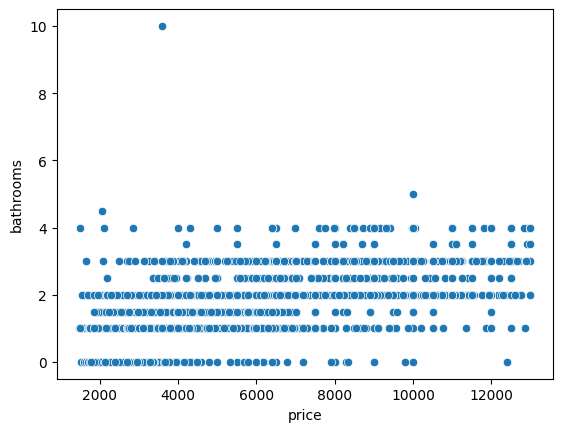

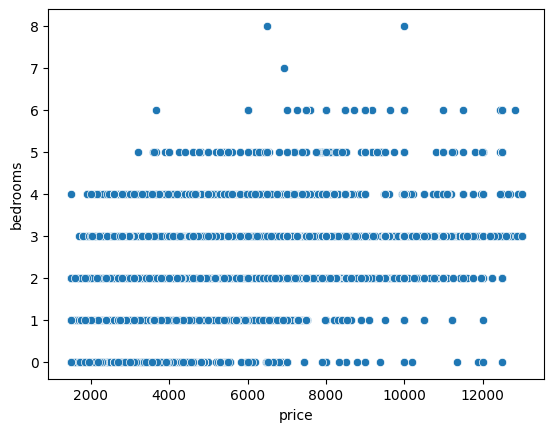

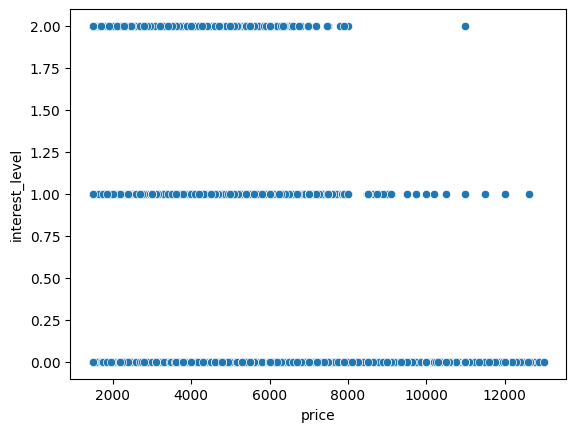

In [398]:
for col in ['bathrooms', 'bedrooms', 'interest_level']:
    sns.scatterplot(data=new_df, x='price', y=col)
    plt.show()

## Creating Features

In [399]:
sq_df = new_df.assign(
    bathrooms_sq = new_df['bathrooms']**2,
    bedrooms_sq = new_df['bedrooms']**2,
    interest_sq = new_df['interest_level'].astype('int')**2
)

In [414]:
corr = sq_df.corr(method='pearson')
corr

,bathrooms,bedrooms,price,interest_level,bathrooms_sq,bedrooms_sq,interest_sq
bathrooms,1.000000,0.517200,0.670808,-0.062819,0.955906,0.548426,-0.058710
bedrooms,0.517200,1.000000,0.547310,0.051282,0.478497,0.928282,0.040125
price,0.670808,0.547310,1.000000,-0.199652,0.646949,0.544612,-0.182283
interest_level,-0.062819,0.051282,-0.199652,1.000000,-0.067757,0.047048,0.943959
bathrooms_sq,0.955906,0.478497,0.646949,-0.067757,1.000000,0.521951,-0.061563
bedrooms_sq,0.548426,0.928282,0.544612,0.047048,0.521951,1.000000,0.036408
interest_sq,-0.058710,0.040125,-0.182283,0.943959,-0.061563,0.036408,1.000000


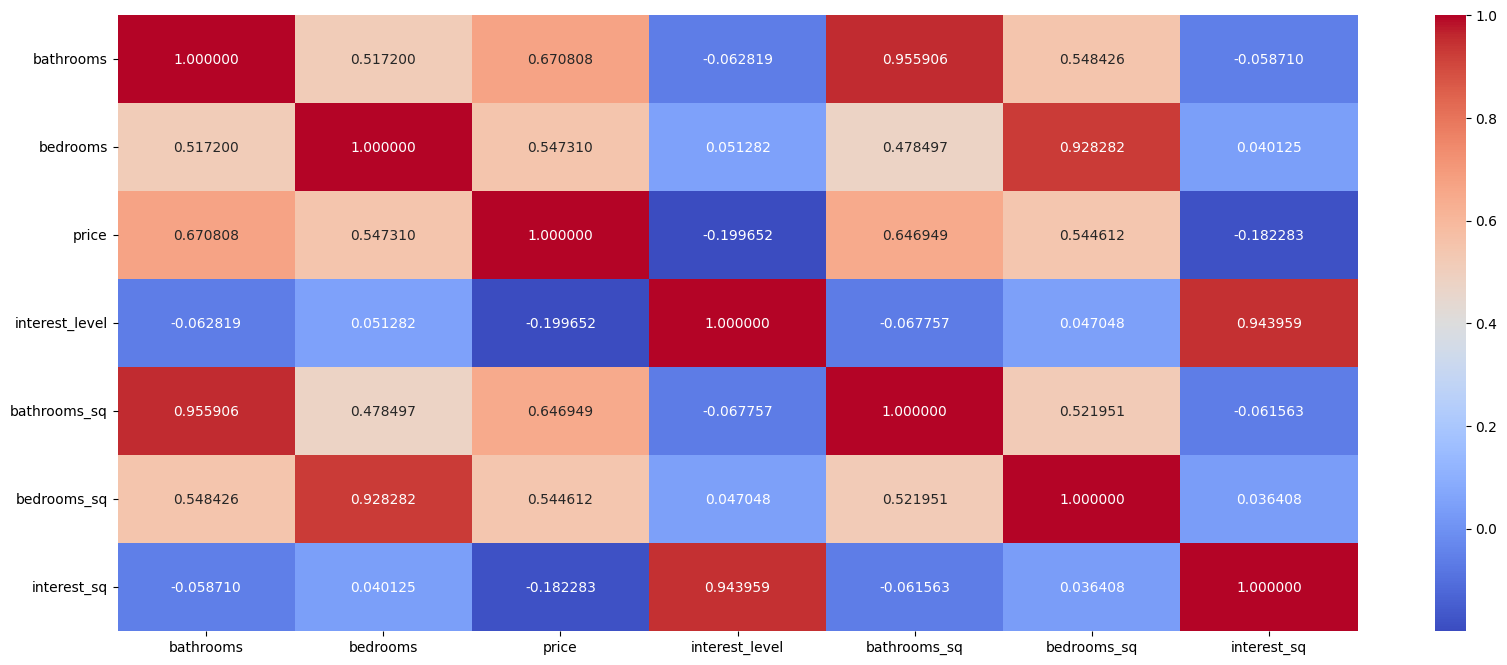

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt = '.6f')
plt.show()

In [401]:
mdf = new_df[['bathrooms', 'bedrooms', 'price']]
mdf.head()


,bathrooms,bedrooms,price
4,1.0,1,2400
6,1.0,2,3800
9,1.0,2,3495
10,1.5,3,3000
15,1.0,0,2795


In [402]:
model_df = new_df[['bathrooms','bedrooms','price']].dropna().copy()
X = model_df[['bathrooms','bedrooms']].astype(float)
y = model_df['price'].astype(float)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=21)

poly = sklearn.preprocessing.PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print('Форма X_train_poly:', X_train_poly.shape)
print('Форма X_test_poly:', X_test_poly.shape)

Форма X_train_poly: (38674, 65)
Форма X_test_poly: (9669, 65)


## 3 models

In [403]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])
def push_result(model_name, mae_tr, mae_te, rmse_tr, rmse_te):
    global result_MAE, result_RMSE
    result_MAE = pd.concat([result_MAE, pd.DataFrame([{'model': model_name, 'train': mae_tr, 'test': mae_te}])],
                           ignore_index=True)
    result_RMSE = pd.concat([result_RMSE, pd.DataFrame([{'model': model_name, 'train': rmse_tr, 'test': rmse_te}])],
                            ignore_index=True)

In [404]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

pred_train_lr = linreg.predict(X_train_poly)
pred_test_lr = linreg.predict(X_test_poly)

mae_tr = mean_absolute_error(y_train, pred_train_lr)
mae_te = mean_absolute_error(y_test, pred_test_lr)
rmse_tr = root_mean_squared_error(y_train, pred_train_lr)
rmse_te = root_mean_squared_error(y_test, pred_test_lr)

push_result('linear_regression', mae_tr, mae_te, rmse_tr, rmse_te)

train_predictions = X_train.copy()
train_predictions['y_true'] = y_train.values
train_predictions['pred_linear_regression'] = pred_train_lr

test_predictions = X_test.copy()
test_predictions['y_true'] = y_test.values
test_predictions['pred_linear_regression'] = pred_test_lr

/var/folders/bs/43zmmfmn38ggq1s0x_48b99r0000gn/T/ipykernel_17503/1445672990.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, pd.DataFrame([{'model': model_name, 'train': mae_tr, 'test': mae_te}])],
/var/folders/bs/43zmmfmn38ggq1s0x_48b99r0000gn/T/ipykernel_17503/1445672990.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, pd.DataFrame([{'model': model_name, 'train': rmse_tr, 'test': rmse_te}])],


In [ ]:
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train, y_train)

pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

mae_tr = mean_absolute_error(y_train, pred_train_tree)
mae_te = mean_absolute_error(y_test, pred_test_tree)
rmse_tr = root_mean_squared_error(y_train, pred_train_tree)
rmse_te = root_mean_squared_error(y_test, pred_test_tree)

push_result('decision_tree', mae_tr, mae_te, rmse_tr, rmse_te)

train_predictions['pred_decision_tree'] = pred_train_tree
test_predictions['pred_decision_tree'] = pred_test_tree

In [ ]:
mean_train = y_train.mean()
median_train = y_train.median()
mean_test = y_test.mean()
median_test = y_test.median()

pred_train_mean = np.full_like(y_train, fill_value=mean_train, dtype=float)
pred_test_mean  = np.full_like(y_test,  fill_value=mean_test,  dtype=float)

pred_train_median = np.full_like(y_train, fill_value=median_train, dtype=float)
pred_test_median  = np.full_like(y_test,  fill_value=median_test,  dtype=float)

mae_tr_mean = mean_absolute_error(y_train, pred_train_mean)
mae_te_mean = mean_absolute_error(y_test, pred_test_mean)
rmse_tr_mean = root_mean_squared_error(y_train, pred_train_mean)
rmse_te_mean = root_mean_squared_error(y_test, pred_test_mean)

mae_tr_med = mean_absolute_error(y_train, pred_train_median)
mae_te_med = mean_absolute_error(y_test, pred_test_median)
rmse_tr_med = root_mean_squared_error(y_train, pred_train_median)
rmse_te_med = root_mean_squared_error(y_test, pred_test_median)

push_result('naive_mean', mae_tr_mean, mae_te_mean, rmse_tr_mean, rmse_te_mean)
push_result('naive_median', mae_tr_med, mae_te_med, rmse_tr_med, rmse_te_med)

train_predictions['pred_naive_mean'] = pred_train_mean
train_predictions['pred_naive_median'] = pred_train_median
test_predictions['pred_naive_mean'] = pred_test_mean
test_predictions['pred_naive_median'] = pred_test_median


In [407]:
result_MAE

,model,train,test
0,linear_regression,752.670568,798.853594
1,decision_tree,752.669057,760.319019
2,naive_mean,1131.815443,1144.533690
3,naive_median,1079.734162,1092.166408


In [408]:
result_RMSE

,model,train,test
0,linear_regression,1070.302933,3959.230852
1,decision_tree,1070.262495,1074.556632
2,naive_mean,1580.460676,1606.034024
3,naive_median,1626.873056,1651.661962


## best model - tree